Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reviews = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None)
reviews.columns = ['review', 'sentiment']

In [46]:
reviews.head(10)

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [47]:
keywords = ['good', 'great', 'excellent', 'awesome','love', 'loves', 'nice','recommend', 'must have','nice', 'beautiful', 'super', 'best']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    reviews[str(key)] = reviews.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

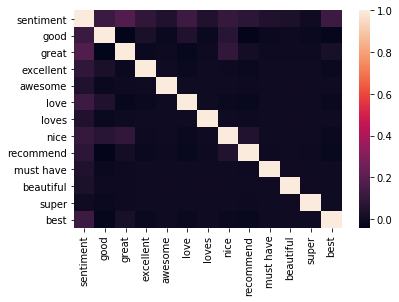

In [48]:
sns.heatmap(reviews.corr())

In [49]:
data = reviews[keywords]
target = reviews['sentiment']

In [54]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 385


In [55]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(target, y_pred)
conf

array([[481,  19],
       [366, 134]], dtype=int64)

In [65]:
accuracy = (conf[0,0]+conf[1,1])/reviews.shape[0]*100
accuracy

61.5

In [68]:
reviews = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
reviews.columns = ['review', 'sentiment']

In [69]:
reviews.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [70]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    reviews[str(key)] = reviews.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

data = reviews[keywords]
target = reviews['sentiment']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 384


In [71]:
conf = confusion_matrix(target, y_pred)
conf

array([[479,  21],
       [363, 137]], dtype=int64)

In [72]:
accuracy = (conf[0,0]+conf[1,1])/reviews.shape[0]*100
accuracy

61.6

The model has an accuracy of about 61.5% for both the amazon and yelp datasets. In both cases, the model was better at predicting negative reviews than positive reviews.